In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt

from tensorcraft.tensor import Tensor
from tensorcraft.distributions import MultiAxisDist, Dist, TileDist, SlabDist
from tensorcraft.viz import draw2DMesh, draw2DTensor, draw2DProcessorView, draw3DTensor, draw3DMesh, latex2figSize

matplotlib.rcParams["figure.dpi"] = 200

In [2]:
LATEX_WIDTH = 347.12354 # Doc
# LATEX_WIDTH = 444.14774 # Doc

figSize = latex2figSize(LATEX_WIDTH, fraction=1, ratio=1)
fontsize = 10
fontsize_small = 8

matplotlib.rcParams.update({
    "figure.figsize": figSize,
    "figure.dpi": 100,
    # "figure.autolayout": True,
    "text.usetex": True,
    "font.family": "serif",
    "font.size": fontsize,  
    "axes.labelsize": fontsize_small,
    "legend.fontsize": fontsize_small,
    "xtick.labelsize": fontsize_small,
    "ytick.labelsize": fontsize_small,

})


In [3]:
t = Tensor((3, 6))
t.info()
print(t.getLinearIndex((0, 4)))

Order: 2
Shape: (3, 6)
Size: 18
4


In [4]:
import networkx as nx
graph = nx.grid_graph(dim=(5,2))
graph.nodes()

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)))

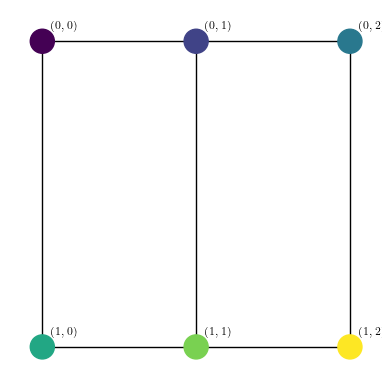

In [5]:
mesh = Tensor((2,3))
fig = plt.figure()
draw2DMesh(fig.add_subplot(111), mesh )

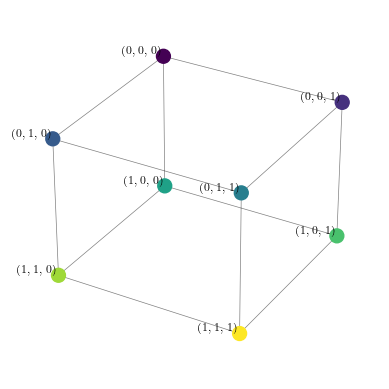

In [6]:
fig = plt.figure()
mesh = Tensor((2,2,2))

draw3DMesh(fig.add_subplot(111, projection="3d"), mesh)

array([ True, False, False, False, False, False, False, False, False,
       False, False, False])

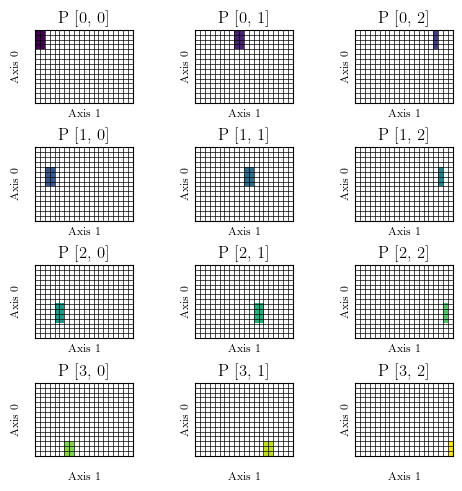

In [22]:
tensor = Tensor((15, 20))
mesh = Tensor((4, 3))
d = MultiAxisDist(mesh, ((0,), (,1)), (0, 0))

processorArragement = d.processorArrangement
subplot_x = processorArragement[0]
subplot_y = (
    processorArragement[1] if len(d.processorArrangement) > 1 else 1
)

fig = plt.figure(layout="constrained")
gs = fig.add_gridspec(nrows=subplot_x, ncols=subplot_y)
axs = gs.subplots(
    sharex=True,
    sharey=True,
)

for p in range(d.numProcessors):

    p_midx = d.getProcessorMultiIndex(p)
    draw2DProcessorView(axs[p_midx[0], p_midx[1]], tensor, d, p)

d.getIndexLocation(tensor, 0)

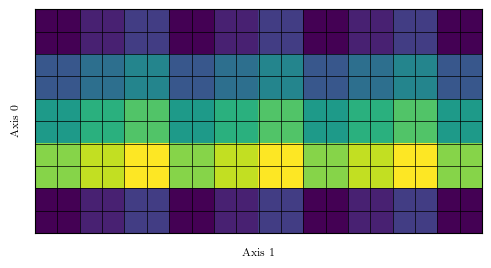

In [8]:
fig = plt.figure(layout="constrained")
tensor = Tensor((10, 20))
d = MultiAxisDist(mesh, ((0,), (1,)), (2, 2))
draw2DTensor(fig.add_subplot(111), tensor, d)

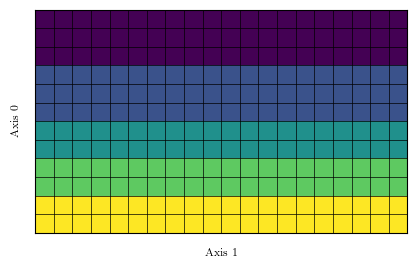

In [9]:
fig = plt.figure()

tensor = Tensor((12, 20))
d = SlabDist(5, 0,0)
draw2DTensor(fig.add_subplot(111), tensor, d)

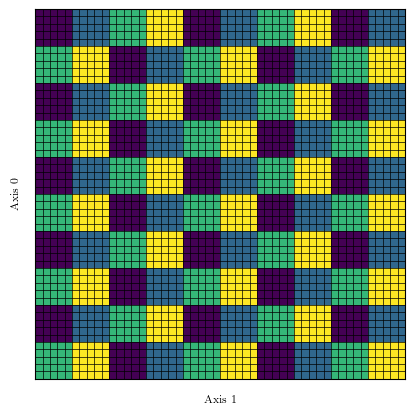

In [10]:
fig = plt.figure()
tensor = Tensor((50, 50))
d = TileDist(4, 5)
draw2DTensor(fig.add_subplot(111), tensor, d)

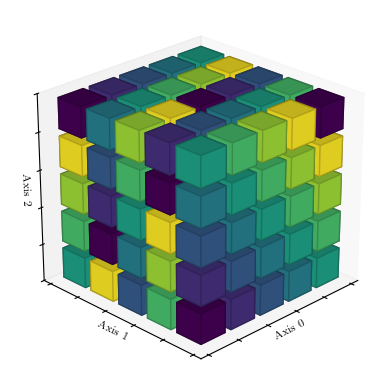

In [11]:
fig = plt.figure()
tensor = Tensor((5, 5, 5))
dist = TileDist(8, 1)
# dist = SlabDist(5, 0)
draw3DTensor(fig.add_subplot(111, projection="3d"), tensor, dist)

In [12]:
import networkx as nx
mesh = Tensor((4,3))
graph = nx.grid_2d_graph(*mesh.shape)
graph

In [13]:
pos = nx.spring_layout(graph)
pos

{(0, 0): array([0.21110341, 0.9915351 ]),
 (0, 1): array([-0.30048395,  0.86281509]),
 (0, 2): array([-0.79825198,  0.68485119]),
 (1, 0): array([0.41754434, 0.46306929]),
 (1, 1): array([-0.11191088,  0.31238939]),
 (1, 2): array([-0.63178572,  0.13835062]),
 (2, 0): array([ 0.63041708, -0.13929467]),
 (2, 1): array([ 0.10586544, -0.30313153]),
 (2, 2): array([-0.41729856, -0.47161678]),
 (3, 0): array([ 0.79691684, -0.68222975]),
 (3, 1): array([ 0.3015635 , -0.85673796]),
 (3, 2): array([-0.20367953, -1.        ])}

In [14]:
import numpy as np
shape = (10, 15, 7)

P = 4

tile_dims = np.zeros((len(shape), P))

for i in range(len(shape)):
    chunk = shape[i] // P
    remainder = shape[i] % P
    tile_dims[i] = chunk
    tile_dims[i][:remainder] += 1

tile_ends = np.cumsum(tile_dims[0])
print(tile_ends)
np.where(7 < tile_ends)[0][0]

[ 3.  6.  8. 10.]


np.int64(2)

In [15]:
tile_dims

array([[3., 3., 2., 2.],
       [4., 4., 4., 3.],
       [2., 2., 2., 1.]])